In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('c://Users//Shravya//Downloads//test-dataset.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
#we have 41188 rows and 21 columns. 1 column is dependent variable is y

## features

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#there are 10 numerical and 11 categorical columns

In [15]:
df.rename(columns={"emp.var.rate":"empvarrate"},inplace=True)
df.rename(columns={"cons.price.idx":"consprice"},inplace=True)
df.rename(columns={"cons.conf.idx":"consconf"},inplace=True)
df.rename(columns={"nr.employed":"nremployed"},inplace=True)
df.rename(columns={"euribor3m":"euri"},inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,consprice,consconf,euri,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [16]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
empvarrate     0
consprice      0
consconf       0
euri           0
nremployed     0
y              0
dtype: int64

## explorotary data  analysis

## univariate analysis

In [ ]:
## Now Let's look at the distribution of our target variable, i.e. y. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [17]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [18]:
# Normalize can be set to True to print proportions instead of number 
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [ ]:
# so there are 88% of clients not subscribing term deposit plan and 11% are subscribing term deposit plans

<AxesSubplot:>

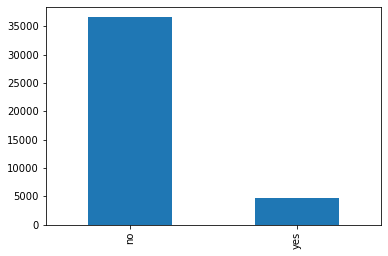

In [19]:
# plotting the bar plot of frequencies
df['y'].value_counts().plot.bar()

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

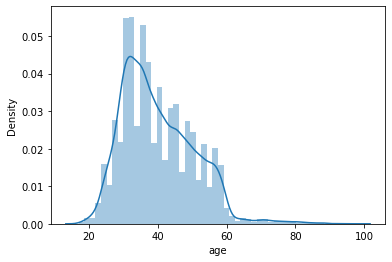

In [21]:
sns.distplot(df["age"])

<AxesSubplot:>

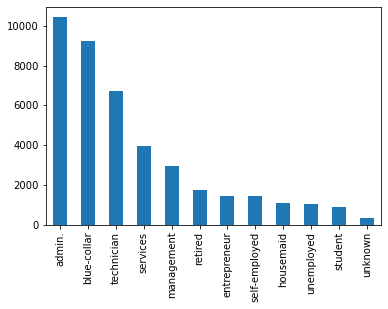

In [22]:
df['job'].value_counts().plot.bar()

<AxesSubplot:>

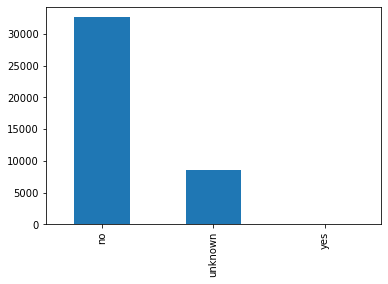

In [23]:
df['default'].value_counts().plot.bar()

## bivariate analysis

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


Text(0, 0.5, 'Percentage')

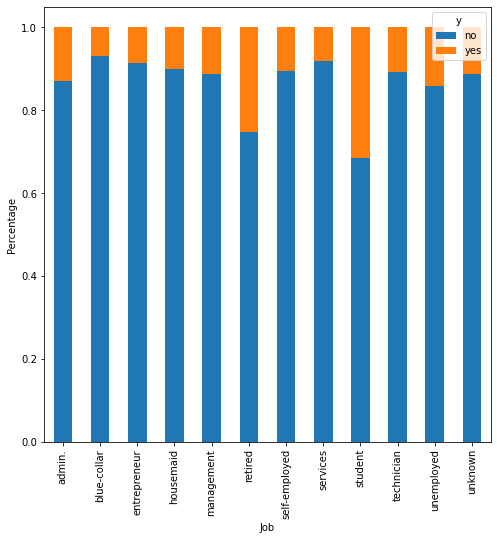

In [26]:
print(pd.crosstab(df['job'],df['y']))

job=pd.crosstab(df['job'],df['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

y           no   yes
default             
no       28391  4197
unknown   8154   443
yes          3     0


Text(0, 0.5, 'Percentage')

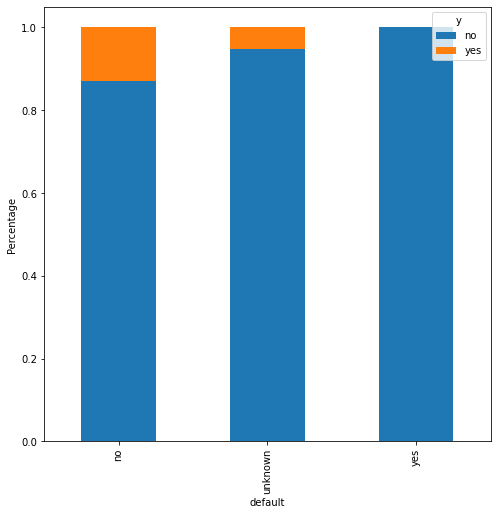

In [28]:
print(pd.crosstab(df['default'],df['y']))

default=pd.crosstab(df['default'],df['y'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [33]:
df['y'].replace('no', 0,inplace=True)
df['y'].replace('yes', 1,inplace=True)

<AxesSubplot:>

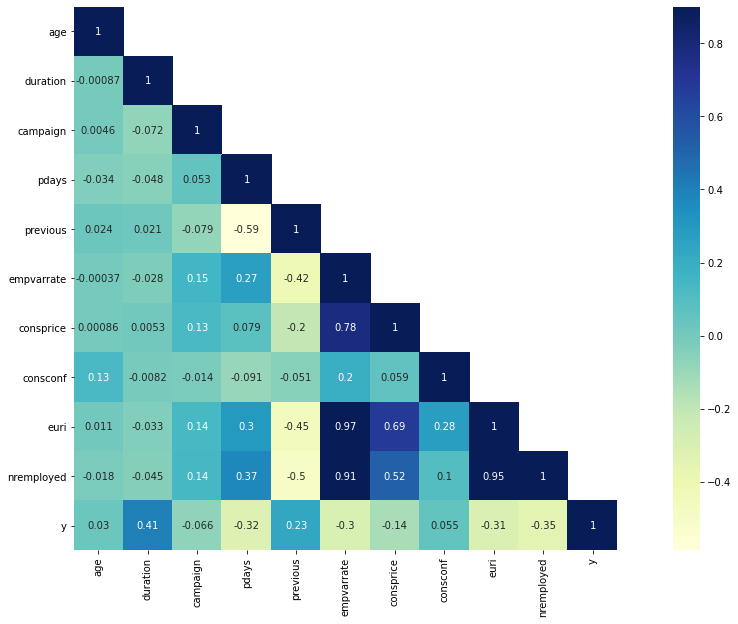

In [35]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [37]:
df.drop(columns=['duration', 'previous','consconf'], inplace=True)

In [38]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
campaign       0
pdays          0
poutcome       0
empvarrate     0
consprice      0
euri           0
nremployed     0
y              0
dtype: int64

## one hot encoding of categorical columns


In [39]:
categorical_col=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]

In [54]:
from sklearn.preprocessing import LabelEncoder 
encode=LabelEncoder()
for x in categorical_col:
    df[x]=encode.fit_transform (df[x])

In [55]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,poutcome,empvarrate,consprice,euri,nremployed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,1,-1.1,94.767,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,1,-1.1,94.767,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,1,-1.1,94.767,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,1,-1.1,94.767,1.028,4963.6,1


In [ ]:
#cataegorical variables changed to numerical values

## chi square test for categorical variables

In [56]:
#splitting the data
y=df['y']
x=df.drop(["y"],axis=1)

In [61]:
x_cat=x[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]]
y=y.to_frame()

In [63]:
from sklearn.feature_selection import SelectKBest
#k is the number of features you want to select 
from sklearn.feature_selection import chi2

In [64]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_cat, y)
x_cat_fs = fs.transform(x_cat)
fs.scores_


array([ 90.17553267,  27.79559829, 167.607283  , 321.9229031 ,
         4.97873433,   1.58700428, 547.95830939,   1.92728404,
        10.23144457,  98.23117432])

Feature 0: 90.175533
Feature 1: 27.795598
Feature 2: 167.607283
Feature 3: 321.922903
Feature 4: 4.978734
Feature 5: 1.587004
Feature 6: 547.958309
Feature 7: 1.927284
Feature 8: 10.231445
Feature 9: 98.231174


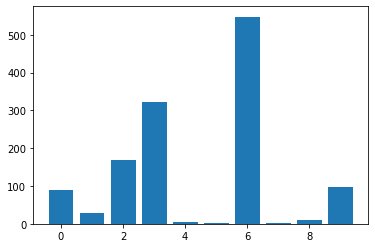

In [65]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#The larger the score the features are significant
#From the above score and graph we can choose the features with highest values 0,2,3,6 i.e,job,education,default,loan are significant.so droping columns

In [68]:
df.drop(columns=['job', 'education','default','loan'], inplace=True)

In [69]:
df

,age,marital,housing,contact,month,day_of_week,campaign,pdays,poutcome,empvarrate,consprice,euri,nremployed,y
0,56,1,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
1,57,1,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
2,37,1,2,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
3,40,1,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
4,56,1,0,1,6,1,1,999,1,1.1,93.994,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,2,0,7,0,1,999,1,-1.1,94.767,1.028,4963.6,1
41184,46,1,0,0,7,0,1,999,1,-1.1,94.767,1.028,4963.6,0
41185,56,1,2,0,7,0,2,999,1,-1.1,94.767,1.028,4963.6,0
41186,44,1,0,0,7,0,1,999,1,-1.1,94.767,1.028,4963.6,1


## RFE -Recursive Feature Engineerinng

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [71]:
x_num=x[["age","campaign","pdays","empvarrate","consprice","euri","nremployed"]]
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=4)
rfe_fit=rfe.fit(x_num,y)

C:\Users\shravya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shravya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shravya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

In [72]:
print("num of Features", rfe_fit.n_features_)
print("selected Features", rfe_fit.support_)
print("feature Rank",rfe_fit.ranking_)

num of Features 4
selected Features [False  True False  True  True  True False]
feature Rank [3 1 4 1 1 1 2]


In [73]:
for i,j in enumerate(rfe_fit.ranking_):
    if(j==1):
        print(x_num.columns[i])

campaign
empvarrate
consprice
euri


In [ ]:
# from RFE age,pdays,nremployed are not significant

 ## splitting the data

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=24)

In [75]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28831, 17)
(12357, 17)
(28831, 1)
(12357, 1)


## scaling the data

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [78]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)


## logistic regression model

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\shravya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [81]:
pred_train=logmodel.predict(x_train)
pred_test=logmodel.predict(x_test)
pred_test


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
##training

In [82]:
df_pred=pd.DataFrame(logmodel.predict_proba(x_train))


In [83]:
df_pred['pred_train']=pred_train

In [84]:
df_pred

,0,1,pred_train
0,0.891549,0.108451,0
1,0.965218,0.034782,0
2,0.940357,0.059643,0
3,0.930635,0.069365,0
4,0.957244,0.042756,0
...,...,...,...
28826,0.942647,0.057353,0
28827,0.943447,0.056553,0
28828,0.945758,0.054242,0
28829,0.952391,0.047609,0


In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(y_train, pred_train))
print(accuracy_score(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25624
           1       0.69      0.21      0.33      3207

    accuracy                           0.90     28831
   macro avg       0.80      0.60      0.64     28831
weighted avg       0.88      0.90      0.88     28831

0.9016683431029101


In [ ]:
# Our model achieved 90.16 accuracy, which is pretty good.

In [86]:
# confusion matrix
conf_mat_heart = confusion_matrix(y_true=y_train, y_pred=pred_train)
pd.DataFrame(conf_mat_heart)

,0,1
0,25311,313
1,2522,685


In [87]:
#testing
df_pred1 = pd.DataFrame(logmodel.predict_proba(x_test))

In [88]:
df_pred1

,0,1
0,0.481115,0.518885
1,0.928527,0.071473
2,0.944582,0.055418
3,0.751991,0.248009
4,0.690120,0.309880
...,...,...
12352,0.957490,0.042510
12353,0.476212,0.523788
12354,0.963292,0.036708
12355,0.963769,0.036231


In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10924
           1       0.71      0.20      0.32      1433

    accuracy                           0.90     12357
   macro avg       0.81      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357

0.8981953548595938


In [ ]:
#Our model test result achieved 89.8 accuracy, which is pretty good.

In [90]:
conf_mat_heart1 = confusion_matrix(y_true=y_test, y_pred=pred_test)
pd.DataFrame(conf_mat_heart1)

,0,1
0,10806,118
1,1140,293


In [91]:
# ROC and AUC curve
FPR, TPR, _ = roc_curve(y_train, pred_train)
FPR1, TPR1, _ = roc_curve(y_test,pred_test)

In [96]:
auc_train = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train)

auc_test = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test)

Train AUC: 0.601
Test AUC: 0.597


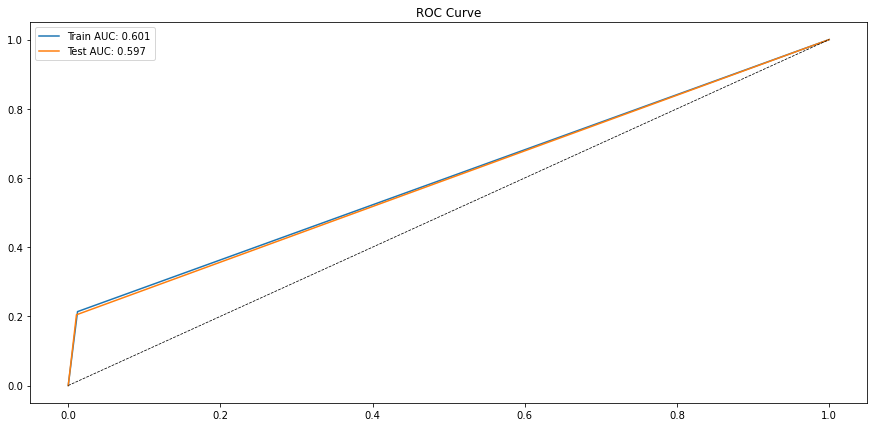

In [98]:
plt.figure(figsize=(15,7))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test)

plt.plot([0,1],[0,1], ls = '--', color = 'black', lw = 0.75)

plt.title('ROC Curve')
plt.legend()
plt.show();

In [ ]:
#Train AUC: 0.601
#Test AUC: 0.597

In [ ]:
## decision tree

In [99]:
from sklearn.tree import DecisionTreeClassifier


In [100]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

In [102]:
# fitting the decision tree model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [103]:
predict = clf.predict(x_test)

In [104]:
# calculating the accuracy score
accuracy_score(y_test, predict)

0.8969005422028

In [ ]:
# test results for logistic and decision tree are same almost 89.6%